# Analysis of Sustainable Development Goals (SDGs), human well-being, and world happiness 
    
    
    Authors:
    Riddhi Tanna
    Vishwa Shah

# Objective

Our main objective is to analyse if SDGs go hand-in-hand with well-being and overall
happiness. We will explore how each of the 17 SDGs correlate with happiness and
well-being. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('SDR2020Database.xlsx', sheet_name='SDR2020 Data')
df_raw = pd.read_excel('SDR2020Database.xlsx', sheet_name='Raw Trend Data')
df_happiness = pd.read_excel('whr_data.xls')
data_panel = pd.read_excel('data_panel.xls')

In [3]:
df_ind_raw = df_raw[df_raw['Country']=='India']
df_ind = df[df['Country']=='India']

In [4]:
df

,Country,id,2020 SDG Index Score,2020 SDG Index Rank,Percentage missing values,Spillover Score (0-100),Regional Score (0-100),Regions used for the SDR,Population in 2020,Goal 1 Dash,...,Goal 8 Regional Score,Goal 9 Regional Score,Goal 10 Regional Score,Goal 11 Regional Score,Goal 12 Regional Score,Goal 13 Regional Score,Goal 14 Regional Score,Goal 15 Regional Score,Goal 16 Regional Score,Goal 17 Regional Score
0,Sweden,SWE,84.724063,1.0,3.571429,67.448900,77.304991,OECD,10099270.0,green,...,82.186544,81.279167,74.567857,85.071773,57.037273,65.476222,59.340776,73.928568,82.198308,61.577634
1,Denmark,DNK,84.558776,2.0,1.190476,66.420200,77.304991,OECD,5792203.0,green,...,82.186544,81.279167,74.567857,85.071773,57.037273,65.476222,59.340776,73.928568,82.198308,61.577634
2,Finland,FIN,83.772759,3.0,1.190476,66.645000,77.304991,OECD,5540718.0,green,...,82.186544,81.279167,74.567857,85.071773,57.037273,65.476222,59.340776,73.928568,82.198308,61.577634
3,France,FRA,81.128541,4.0,1.190476,51.124000,77.304991,OECD,65273512.0,green,...,82.186544,81.279167,74.567857,85.071773,57.037273,65.476222,59.340776,73.928568,82.198308,61.577634
4,Germany,DEU,80.774386,5.0,1.190476,57.002000,77.304991,OECD,83783945.0,yellow,...,82.186544,81.279167,74.567857,85.071773,57.037273,65.476222,59.340776,73.928568,82.198308,61.577634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,OECD members,_OECD,77.304991,NaN,1.190476,66.989900,NaN,NaN,NaN,green,...,73.244191,46.329076,52.515273,69.462212,80.378303,87.780833,59.353733,60.347285,63.573379,61.067545
200,Low-income Countries,_LIC,52.468608,NaN,0.000000,99.396111,NaN,NaN,NaN,red,...,73.244191,46.329076,52.515273,69.462212,80.378303,87.780833,59.353733,60.347285,63.573379,61.067545
201,Lower-middle-income Countries,_LMIC,61.648237,NaN,0.000000,98.551111,NaN,NaN,NaN,orange,...,73.244191,46.329076,52.515273,69.462212,80.378303,87.780833,59.353733,60.347285,63.573379,61.067545
202,Upper-middle-income Countries,_UMIC,73.240621,NaN,0.000000,95.155000,NaN,NaN,NaN,yellow,...,73.244191,46.329076,52.515273,69.462212,80.378303,87.780833,59.353733,60.347285,63.573379,61.067545


In [5]:
df['Regional Score (0-100)'].isnull().sum()

11

In [6]:
df['id'].isnull().sum()

0

In [7]:
df_ind_raw.index = np.arange(1,22)
df_ind_raw.columns
years = np.array(df_ind_raw['Year'])

In [8]:
df_ind_raw.isnull()

,Country,id,Year,Population,sdg1_wpc,sdg1_320pov,sdg1_oecdpov,sdg2_undernsh,sdg2_stuntihme,sdg2_wasteihme,...,sdg15_cpfa,sdg15_redlist,sdg16_homicides,sdg16_detain,sdg16_cpi,sdg16_rsf,sdg16_prison,sdg17_govex,sdg17_oda,sdg17_govrev
1,False,False,False,False,True,True,True,False,False,False,...,False,False,False,True,True,True,True,False,True,False
2,False,False,False,False,True,True,True,False,False,False,...,False,False,False,True,True,True,True,True,True,False
3,False,False,False,False,True,True,True,False,False,False,...,False,False,False,True,True,True,True,True,True,False
4,False,False,False,False,True,True,True,False,False,False,...,False,False,False,True,True,True,True,False,True,False
5,False,False,False,False,True,True,True,False,False,False,...,False,False,False,True,True,True,True,False,True,False
6,False,False,False,False,True,True,True,False,False,False,...,False,False,False,True,True,True,True,False,True,False
7,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,True,True,True,False,True,False
8,False,False,False,False,True,True,True,False,False,False,...,False,False,False,True,True,True,True,True,True,False
9,False,False,False,False,True,True,True,False,False,False,...,False,False,False,True,True,True,True,True,True,False
10,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,True,True,True,False,True,False


In [9]:
df_happiness

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8421,0.031646,7.904126,7.780075,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846,2.430343,1.446356,1.106192,0.740824,0.690577,0.124200,0.480524,3.253415
1,Denmark,Western Europe,7.6195,0.034657,7.687428,7.551572,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838,2.430343,1.501548,1.108008,0.762862,0.686160,0.207615,0.484993,2.868296
2,Switzerland,Western Europe,7.5715,0.036243,7.642536,7.500463,11.117368,0.941742,74.400101,0.918788,0.024629,0.291698,2.430343,1.565899,1.079469,0.816415,0.653488,0.204040,0.413019,2.839148
3,Iceland,Western Europe,7.5539,0.059373,7.670271,7.437528,10.877768,0.982938,73.000000,0.955123,0.160274,0.672865,2.430343,1.482190,1.172279,0.772319,0.697701,0.292526,0.169940,2.966945
4,Netherlands,Western Europe,7.4640,0.027326,7.517559,7.410441,10.931812,0.941601,72.400116,0.913116,0.175404,0.337938,2.430343,1.501072,1.079151,0.753425,0.646585,0.302397,0.383531,2.797818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.5118,0.120454,3.747890,3.275710,7.925777,0.786871,48.700001,0.714954,-0.130536,0.915377,2.430343,0.450848,0.730561,0.006992,0.405455,0.102819,0.015284,1.799821
145,Botswana,Sub-Saharan Africa,3.4665,0.073872,3.611289,3.321711,9.781536,0.784171,59.269188,0.824394,-0.246159,0.800619,2.430343,1.099198,0.724478,0.339868,0.538626,0.027394,0.088468,0.648460
146,Rwanda,Sub-Saharan Africa,3.4147,0.067830,3.547647,3.281753,7.676118,0.552339,61.399727,0.896758,0.060526,0.166801,2.430343,0.363624,0.202183,0.406969,0.626681,0.227457,0.492669,1.095149
147,Zimbabwe,Sub-Saharan Africa,3.1448,0.058443,3.259349,3.030251,7.942595,0.750470,56.200840,0.676700,-0.047346,0.820999,2.430343,0.456724,0.648552,0.243230,0.358907,0.157088,0.075471,1.204845


In [10]:
df_sdg_cleaned = df[:-11]
df_sdg_cleaned

,Country,id,2020 SDG Index Score,2020 SDG Index Rank,Percentage missing values,Spillover Score (0-100),Regional Score (0-100),Regions used for the SDR,Population in 2020,Goal 1 Dash,...,Goal 8 Regional Score,Goal 9 Regional Score,Goal 10 Regional Score,Goal 11 Regional Score,Goal 12 Regional Score,Goal 13 Regional Score,Goal 14 Regional Score,Goal 15 Regional Score,Goal 16 Regional Score,Goal 17 Regional Score
0,Sweden,SWE,84.724063,1.0,3.571429,67.4489,77.304991,OECD,10099270.0,green,...,82.186544,81.279167,74.567857,85.071773,57.037273,65.476222,59.340776,73.928568,82.198308,61.577634
1,Denmark,DNK,84.558776,2.0,1.190476,66.4202,77.304991,OECD,5792203.0,green,...,82.186544,81.279167,74.567857,85.071773,57.037273,65.476222,59.340776,73.928568,82.198308,61.577634
2,Finland,FIN,83.772759,3.0,1.190476,66.6450,77.304991,OECD,5540718.0,green,...,82.186544,81.279167,74.567857,85.071773,57.037273,65.476222,59.340776,73.928568,82.198308,61.577634
3,France,FRA,81.128541,4.0,1.190476,51.1240,77.304991,OECD,65273512.0,green,...,82.186544,81.279167,74.567857,85.071773,57.037273,65.476222,59.340776,73.928568,82.198308,61.577634
4,Germany,DEU,80.774386,5.0,1.190476,57.0020,77.304991,OECD,83783945.0,yellow,...,82.186544,81.279167,74.567857,85.071773,57.037273,65.476222,59.340776,73.928568,82.198308,61.577634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Timor-Leste,TLS,NaN,NaN,NaN,NaN,67.246275,East & South Asia,1318442.0,red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,Tonga,TON,NaN,NaN,NaN,NaN,49.615849,Oceania,105697.0,yellow,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,Tuvalu,TUV,NaN,NaN,NaN,NaN,49.615849,Oceania,11792.0,grey,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,St. Vincent and the Grenadines,VCT,NaN,NaN,NaN,NaN,70.383882,LAC,110947.0,grey,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_sdg_cleaned['2020 SDG Index Score'].fillna(df_sdg_cleaned['Regional Score (0-100)'], inplace=True)

/Users/riddhi/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


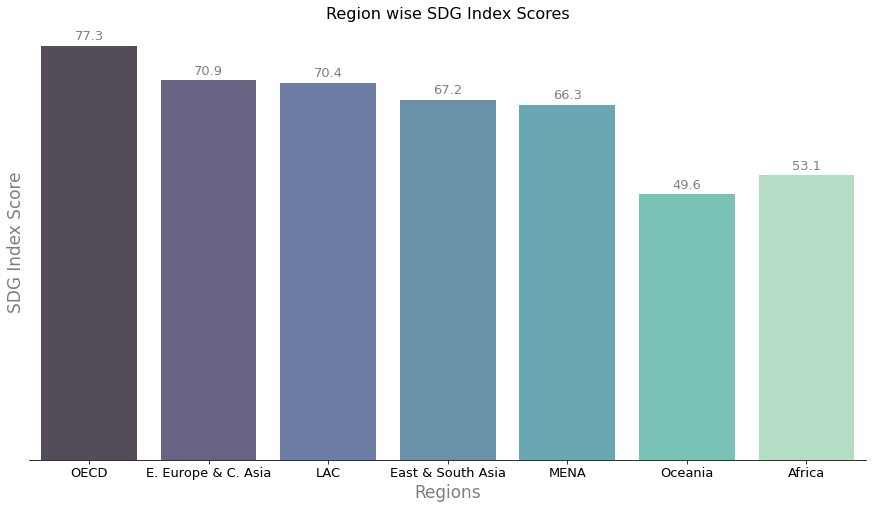

In [12]:
fig, ax = plt.subplots(figsize = [15,8])
right_side = ax.spines["right"]
top = ax.spines['top']
left = ax.spines['left']
right_side.set_visible(False)
top.set_visible(False)
left.set_visible(False)
splot = sns.barplot(x=df_sdg_cleaned['Regions used for the SDR'].unique(),y=df_sdg_cleaned['Regional Score (0-100)'].unique(), palette='mako', alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=13,alpha=0.5)
plt.tick_params(axis = "y", which = "both", bottom = False, top = False,length=0)
plt.xticks(fontsize = 13)
plt.yticks(visible=False)
plt.title('Region wise SDG Index Scores', fontsize = 16)
plt.xlabel('Regions', fontsize = 17, alpha=0.5)
plt.ylabel('SDG Index Score', fontsize = 17, alpha=0.5)

plt.show()

In [13]:
df_merged = pd.merge(df_sdg_cleaned, df_happiness, left_on='Country', right_on='Country name')


In [14]:
df_merged.drop(df_merged.index[len(df_merged)-1], inplace=True)
df_comb = pd.DataFrame(data=(df_merged['Country'], df_merged['id'], df_merged['Ladder score'], df_merged['2020 SDG Index Score'],df_merged['Regional Score (0-100)'], df_merged['Regions used for the SDR']))

In [15]:
df_comb = df_comb.transpose()
df_comb['Regions used for the SDR'].unique()

array(['OECD', 'E. Europe & C. Asia', 'LAC', 'East & South Asia', 'MENA',
       'Africa'], dtype=object)

In [16]:
df_comb[df_comb['Country']=='Maldives']

,Country,id,Ladder score,2020 SDG Index Score,Regional Score (0-100),Regions used for the SDR
77,Maldives,MDV,5.1976,67.5905,67.2463,East & South Asia


['OECD' 'E. Europe & C. Asia' 'LAC' 'East & South Asia' 'MENA' 'Africa']


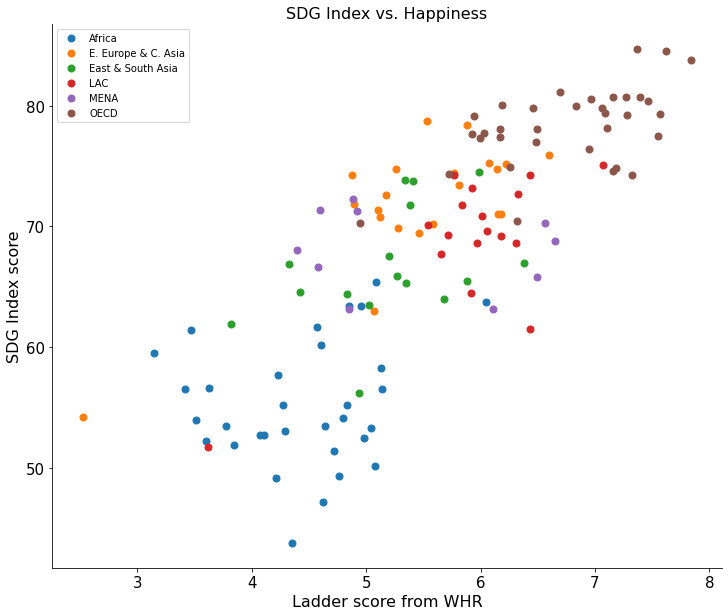

In [17]:
print(df_comb['Regions used for the SDR'].unique())
groups = df_comb.groupby('Regions used for the SDR')

fig, ax = plt.subplots(figsize = [12,10])
right_side = ax.spines["right"]
top = ax.spines['top']
right_side.set_visible(False)
top.set_visible(False)
for name, group in groups:
    plt.plot(group["Ladder score"], group["2020 SDG Index Score"], marker="o", linestyle="", label=name, markersize=7)
plt.legend()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('SDG Index vs. Happiness', fontsize = 16)
plt.ylabel('SDG Index score', fontsize = 16)
plt.xlabel('Ladder score from WHR', fontsize = 16)
plt.show()

# Linear Regression 

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.metrics import mean_squared_error
import numpy as np


In [19]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_merged['2020 SDG Index Score'], df_merged['Ladder score'])
y_pred = np.array(df_merged['2020 SDG Index Score'])*slope + intercept
#print(std_err)
print('R-value: ', r_value)
print('R-squared: ', r_value**2)
print('p-value: ', p_value)
print('RMSE - linear: ', mean_squared_error(y_pred, df_merged['Ladder score']))
print('RMSE - quadratic: ',mean_squared_error(y_pred_poly, df_merged.sort_values('2020 SDG Index Score')['Ladder score']))


R-value:  0.7838567988434155
R-squared:  0.6144314810930468
p-value:  2.895198420064518e-28
RMSE - linear:  0.47043931218397445


NameError: name 'y_pred_poly' is not defined

In [ ]:
pregmodel = np.poly1d(np.polyfit(df_merged['2020 SDG Index Score'], df_merged['Ladder score'], 2))
y_pred_poly = pregmodel(df_merged.sort_values('2020 SDG Index Score')['2020 SDG Index Score'])
print(mean_squared_error(y_pred_poly, df_merged.sort_values('2020 SDG Index Score')['Ladder score']))

In [ ]:
print(df_comb['Regions used for the SDR'].unique())
groups = df_comb.groupby('Regions used for the SDR')
fig, ax = plt.subplots(figsize = [12,8])
right_side = ax.spines["right"]
top = ax.spines['top']
right_side.set_visible(False)
top.set_visible(False)
for name, group in groups:
    plt.plot(group["2020 SDG Index Score"], group["Ladder score"], marker="o", linestyle="", label=name, markersize=7,alpha=0.7)

plt.plot(df_merged['2020 SDG Index Score'], y_pred, color='magenta', label = 'Linear Regression Line',alpha=0.7)
plt.plot(df_merged.sort_values('2020 SDG Index Score')['2020 SDG Index Score'], y_pred_poly, color='k', label = 'Quadratic Regression Curve',alpha=0.7)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize=8)
plt.title('SDG Index vs. Happiness', fontsize = 16)
plt.xlabel('SDG Index score', fontsize = 16,alpha=0.5)
plt.ylabel('Ladder score from WHR', fontsize = 16,alpha=0.5)
plt.show()

In [ ]:
for i in range(1,18):
    df_merged['Goal '+str(i)+ ' Score'].fillna(df_merged['Goal '+ str(i) + ' Regional Score'], inplace=True)
groups = df_merged.groupby('Regions used for the SDR')

In [ ]:
dict = {'SDG1': 'End Poverty',

'SDG2': 'Zero Hunger',

'SDG3': 'Good Health and Well-Being',

'SDG4': 'Quality Education',

'SDG5': 'Gender Equality',

'SDG6': 'Clean Water and Sanitation',

'SDG7': 'Affordable and Clean Energy',

'SDG8': 'Decent Work and Economic Growth',

'SDG9': 'Industry, Innovation and Infrastructure',

'SDG10': 'Reduced Inequalities',

'SDG11': 'Sustainable Cities and Communities',

'SDG12': 'Responsible Consumption and Production',

'SDG13': 'Climate Action',

'SDG14': 'Life Below Water',

'SDG15': 'Life on Land',

'SDG16': 'Peace, Justice and Strong Institutions',

'SDG17': 'Partnerships for the Goals'}

# SDGs - linear regression

In [ ]:
for i in range(1,18):
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_merged['Goal '+str(i)+' Score'], df_merged['Ladder score'])
    y_pred = np.array(df_merged.sort_values('Goal '+str(i)+' Score')['Goal '+str(i)+' Score'])*slope + intercept
    
    fig, ax = plt.subplots(figsize = [12,10])
    right_side = ax.spines["right"]
    top = ax.spines['top']
    right_side.set_visible(False)
    top.set_visible(False)
    for name, group in groups:
        plt.plot(group.sort_values('Goal '+str(i)+' Score')["Goal "+str(i)+" Score"], group["Ladder score"], marker="o", linestyle="", label=name, markersize=7)

    plt.plot(df_merged.sort_values('Goal '+str(i)+' Score')["Goal "+str(i)+" Score"], y_pred, color='k', label = 'Linear Regression Line', linewidth=1)
    
    
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.legend()
    plt.title('SDG {}: {} vs. Happiness'.format(i, dict['SDG'+str(i)]), fontsize = 16,alpha=0.5)
    plt.xlabel('SDG {}:  {} Score'.format(i,dict['SDG'+str(i)]), fontsize = 16,alpha=0.5)
    plt.ylabel('Ladder score from WHR', fontsize = 16,alpha=0.5)
    plt.show()
    
    print(std_err)
    print('R:',r_value)
    print('R-squared:',r_value**2)
    print("p-value:",p_value)
    print("MSE:",mean_squared_error(y_pred, df_merged['Ladder score']))

In [ ]:

lst = np.array(df_merged.columns[-54:-54+17])
ls = ['Ladder score']
fin = np.append(lst,ls)



df_table = pd.DataFrame(df_merged[fin].corr()['Ladder score'])
df_table.index = np.append(sdgs,ls)
df_table

In [ ]:
df_sdg_cleaned[ df_sdg_cleaned['Country']=='Bangladesh']
df_merged[ df_merged['Country']=='Bangladesh']
df_merged[ df_merged['Country']=='Bangladesh'][features].values[0]

In [ ]:
unique = sdgs
values = df_ind[features].values[0]
values_2 = df_merged[ df_merged['Country']=='Afghanistan'][features].values[0]
values_3 = df_merged[ df_merged['Country']=='Finland'][features].values[0]
fig , ax = plt.subplots(figsize = [12,20])

right_side = ax.spines["right"]
top = ax.spines['top']
bottom = ax.spines['bottom']
right_side.set_visible(False)
top.set_visible(False)
bottom.set_visible(False)

bar3 = ax.barh(np.arange(12,17*25+12,25) ,values_3, align='center', height=6,label='Finland', color='brown', alpha=0.7)
bar1 = ax.barh(np.arange(6,17*25+6,25) ,values_2, align='center', height=6,  color='green',label='Afghanistan', alpha=0.7)
bar2 = ax.barh(np.arange(0,17*25,25) ,values, align='center', height=6,label='India', color='orange', alpha=0.7)

ax.set(yticks=np.arange(6,6+17*25,25),yticklabels=unique)
plt.yticks(fontsize=13)
plt.legend()

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+1, i.get_y()+0.5, \
            str(round((i.get_width()), 2)), fontsize=13, color='dimgrey')
    
plt.tick_params(axis = "x", which = "both", bottom = False, top = False,length=0)
plt.xticks(visible=False)
plt.xlabel('SDG Score', alpha=0.5,fontsize=17)
plt.ylabel('SDG',alpha=0.5,fontsize=17)

  
plt.title('India, Afghanistan and Finland - Individual SDG Scores', fontsize = 17)
plt.show()

In [ ]:
data_panel = data_panel[data_panel['year']==2020]

In [ ]:
data_panel.index = np.arange(0,len(data_panel))

In [ ]:
data_panel_merged = pd.merge(data_panel, df_merged, right_on = 'Country', left_on='Country name')
data_panel_merged.columns

In [ ]:
data_panel_merged.drop(41, inplace=True)

In [ ]:
import seaborn as sns
data_panel_merged[['2020 SDG Index Score','Positive affect','Negative affect']].corr()

In [ ]:
fig , ax = plt.subplots(figsize=[15,8])
list_fts = ['2020 SDG Index Score','Life Ladder','Log GDP per capita', 'Social support_x','Healthy life expectancy at birth','Freedom to make life choices_x', 'Generosity_y','Perceptions of corruption_x']
sns.heatmap(data_panel_merged[['2020 SDG Index Score','Life Ladder','Log GDP per capita', 'Social support_x','Healthy life expectancy at birth','Freedom to make life choices_x', 'Generosity_y','Perceptions of corruption_x']].corr(), cmap='mako')
ax.set_title('Correlation of SDG score with the six factors used in WHR and with life ladder score', fontsize=15)


# PCA

In [ ]:
import sklearn as sk
from sklearn.decomposition import PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
features = df_merged.columns[-54:-54+17]
# Separating out the features
x = df_merged.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=17)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principal_components)

In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
pca_weights = pca.components_
weights = pd.DataFrame(pca_weights)
abs(weights.T[0]).sort_values(0)

In [ ]:
def loading_plot(coeff,labels=None):
    """
    score = projections of the points on the various principle components 
    coeff = coefficients of the linear combinations for the principle components 
    """
    fig , ax = plt.subplots(figsize = [13,10])
    n = coeff.shape[0] #number of principle components
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.8, lw=3) #for the loading plot
        if labels is None:
            plt.text(coeff[i,0]*1.05, coeff[i,1]*1.05, "Var"+str(i+1), color = 'green', ha='center', va='center')
        else:
            plt.text(coeff[i,0]*1.05, coeff[i,1]*1.05, labels[i], color = 'k', ha='center', va='center')
    
    right_side = ax.spines["right"]
    top = ax.spines['top']
    right_side.set_visible(False)
    top.set_visible(False)
    plt.title('Loading plot - PCA of 17 SDGs', fontsize=15)
    plt.xlabel("PC{}".format(1), fontsize = 15)
    plt.ylabel("PC{}".format(2), fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.grid(visible=False)
    
def biplot(score,coeff,labels=None):
    """
    score = projections of the points on the various principle components 
    coeff = coefficients of the linear combinations for the principle components 
    """
    xs = score[:,0] #x values - PC1
    ys = score[:,1] #y values - PC2
    n = coeff.shape[0] #number of principle components
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    fig , ax = plt.subplots(figsize = [15,10])
    plt.scatter(xs*scalex,ys*scaley, color='b') #for the scatter plot - plotting the scaled values
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.8, lw=3) #for the loading plot
        if labels is None:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, "Var"+str(i+1), color = 'green', ha='center', va='center')
        else:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color = 'k', ha='center', va='center')
            
    right_side = ax.spines["right"]
    top = ax.spines['top']
    right_side.set_visible(False)
    top.set_visible(False)
    plt.xlabel("PC{}".format(1), fontsize = 15)
    plt.ylabel("PC{}".format(2), fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.grid(visible=False)

"""
principle_components[:,0:2] returns the projections of all the points on the first two principle components - needed to 
plot the scatter plot

pca.components_ returns the coefficients for the linear combinations
"""    

loading_plot(np.transpose(pca.components_[0:2,:]),list(features))
biplot(principal_components[:,0:2],np.transpose(pca.components_[0:2,:]),list(features))
